In [307]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import random
import numpy as np
import os
import pickle as pkl
from itertools import permutations
%matplotlib inline

In [308]:
jpid='046A1001'
df=pd.read_csv("~/Desktop/Summer Project/Linear Model/clean_data/"+jpid+"_clean.csv")

In [309]:
# replacing '-' visibility entries with average visibility of the rest of the df
avg_vis=np.mean((df[df['Visibility (km)']!='-'])['Visibility (km)'].astype(np.float32))
df.loc[df['Visibility (km)']=='-','Visibility (km)']=avg_vis
df['Visibility (km)']=df['Visibility (km)'].astype(np.float32)

In [310]:
# replacing 'Calm' entries in wind speed with 0
df.loc[df['Wind Speed (km/h)']=='Calm','Wind Speed (km/h)']=0
df['Wind Speed (km/h)']=df['Wind Speed (km/h)'].astype(np.float32)

In [311]:
# day of week and hour are categorical not continuous
df['WeekDay']=df['WeekDay'].astype(object)
df['Hours']=df['Hours'].astype(object)

In [312]:
# swapping 64 bit fields for 32 bit ones
for col in list(df):
    if df[col].dtype=='int64':
        df[col]=df[col].astype(np.int32)
    elif df[col].dtype=='float64':
        df[col]=df[col].astype(np.float32)

In [313]:
# wtf i dunno
df=df[df['Cumulative Time Taken']>=0]

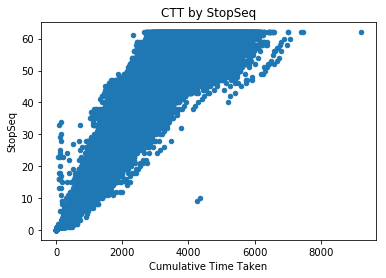

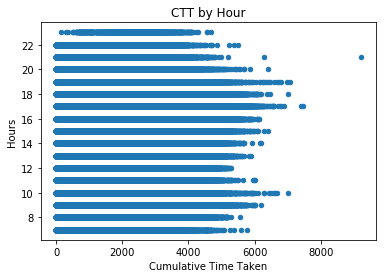

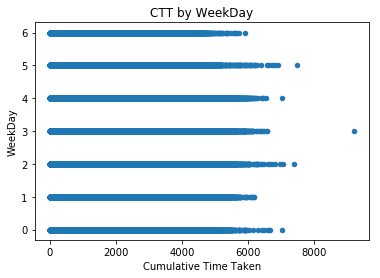

In [314]:
df.plot(x='Cumulative Time Taken', y='StopSeq', kind='scatter',title='CTT by StopSeq')
df.plot(x='Cumulative Time Taken', y='Hours', kind='scatter',title='CTT by Hour')
df.plot(x='Cumulative Time Taken', y='WeekDay', kind='scatter',title='CTT by WeekDay')

In [315]:
# required_cols=['StopSeq','WeekDay','Hours']
# optional_extras=['Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']
# possible_combos=[]
# for i in range(len(optional_extras)+1):
#     for subset in permutations(optional_extras, i):
#             new=required_cols
#             new.append(list(subset))
#             print(new)
# #             if new not in possible_combos:
# #                 possible_combos.append(new)
# # combo_accuracy={}
# # for combo in possible_combos:
#     print(combo)
# # train_test_coeffs={}
# # test_sizes=[.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
# # for size in test_sizes:
# #     train, test = train_test_split(df, test_size = size)

# #     model_scores={}
    
# #     X = df[combo]
# #     y = df['Cumulative Time Taken']
    
# # #     X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# # #     y_test = test['Cumulative Time Taken']
    
# #     ols=linear_model.LinearRegression()
    
# #     model=ols.fit(X,y)
    
# #     combo_accuracy[combo]=model.score(X,y)
    
# #     train_test_model_scores[str(1-size)+"/"+str(size)]=model.score(X_test, y_test)
# #     train_test_coeffs[str(1-size)+"/"+str(size)]=model.coef_

In [316]:
# for key in  train_test_model_scores:
#     print(train_test_model_scores[key])
    
# for key in train_test_coeffs:
#     print(train_test_coeffs[key])

### 70/30 Train/Test Split

In [317]:
# train, test = train_test_split(df, test_size = 0.3)

In [318]:
# X_train = train[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_train = train['Cumulative Time Taken']

# X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_test = test['Cumulative Time Taken']

In [319]:
# ols=linear_model.LinearRegression()

In [320]:
# model=ols.fit(X_train,y_train)

In [321]:
# model.coef_

In [322]:
# print(model.score(X_test, y_test))

In [323]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

### 80/20 Train/Test Split

In [324]:
# train, test = train_test_split(df, test_size = 0.2)

In [325]:
# X_train = train[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_train = train['Cumulative Time Taken']

# X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_test = test['Cumulative Time Taken']

In [326]:
# ols=linear_model.LinearRegression()

In [327]:
# model=ols.fit(X_train,y_train)

In [328]:
# model.score(X_test, y_test)

In [329]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

### 60/40 Train/Test Split

In [330]:
# train, test = train_test_split(df, test_size = 0.4)

In [331]:
# X_train = train[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_train = train['Cumulative Time Taken']

# X_test = test[['StopSeq','WeekDay','Hours','Day','Month','Temperature (C)','Visibility (km)','Wind Speed (km/h)']]
# y_test = test['Cumulative Time Taken']

In [332]:
# ols=linear_model.LinearRegression()

In [333]:
# model=ols.fit(X_train,y_train)

In [334]:
# model.score(X_test, y_test)

In [335]:
# results=model.predict(X_test)
# a=pd.DataFrame({'Actual':y_test,'Result':results,'Error':y_test-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

### Test on full df

In [336]:
train, test = train_test_split(df, test_size = 0)

In [337]:
X_train = train[['StopSeq','WeekDay','Hours']]
y_train = train['Cumulative Time Taken']

In [338]:
ols=linear_model.LinearRegression()

In [339]:
model=ols.fit(X_train,y_train)

In [340]:
model.score(X_train, y_train)

0.90186004740257841

In [341]:
# os.getcwd()
pkl.dump(model,open('pickle_files/'+jpid+'.pkl','wb'),pkl.HIGHEST_PROTOCOL)

In [342]:
# results=model.predict(X_train)
# a=pd.DataFrame({'Actual':y_train,'Result':results,'Error':y_train-results})
# a=a[['Actual','Result','Error']]
# print(np.mean(a['Error']))
# a

In [343]:
test_row=pd.DataFrame({'StopSeq':[10],'WeekDay':[0],'Hours':[10]})

In [344]:
model.predict(test_row)[0]

683.42631963279393

In [345]:
with open("pickle_files/"+jpid+".pkl", "rb") as input_file: # loading pickle file
    data=pkl.load(input_file)
    a=data.predict(test_row)[0] # predicting test_row  to test pickle file
    print(a)

683.426319633
